<h1>MNIST digits classification task using Dense Network</h1>

<h2>Loading the dataset</h2>

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

<h2>Visualizing the data</h2>

In [9]:
import matplotlib.pyplot as plt


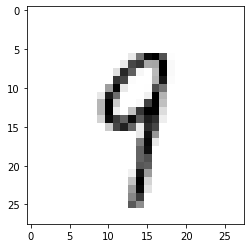

In [10]:
digit = train_images[900]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

<h2>Network architecture</h2>

In [11]:
from keras import models

In [12]:
from keras import layers

In [13]:
network = models.Sequential()

In [14]:
network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
network.add(layers.Dense(10, activation='softmax'))

<blockquote>Our network consists of two <i>Dense</i> layers which are densely connected neural layers. The second layer is a 10-way softmax layer, which means it returns an array of 10 probability scores.</blockquote>

<blockquote>Each layer in a deep network applies a transformation that disentangles the data a little—and a deep stack of layers makes tractable an extremely complicated disentanglement process.</blockquote>

<h2>Compilation Step</h2>

<blockquote>We have our model ready but before compiling our model, we need three more things.
<ul>
<li>Loss Function</li>
<li>Optimizer</li>
<li>Metrics to monitor during training and testing</li>
</ul></blockquote>

In [16]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

<h2>Preparing the image data</h2>

<blockquote>Before training, we will preprocess the data by reshaping it into the shape network expects and scaling it so that all values are in the [0, 1] interval.</blockquote>

In [17]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

<h2>Preparing the labels</h2>

In [18]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

<h2>Training the network</h2>

In [19]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)


Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.2542 - accuracy: 0.9258
Epoch 2/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1022 - accuracy: 0.9702
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0674 - accuracy: 0.9798
Epoch 4/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0493 - accuracy: 0.9855
Epoch 5/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0383 - accuracy: 0.9880
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0283 - accuracy: 0.9916
Epoch 7/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0218 - accuracy: 0.9936
Epoch 8/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0171 - accuracy: 0.9949
Epoch 9/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.0130 - accuracy: 0.9964
Epoch 10/10
60000/60000 [==========================

<h2>Accuracy and Loss of trained model</h2>

In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

10000/10000 [==============================] - 1s 68us/step
Test Accuracy: 0.9818000197410583
Test Loss: 0.06835417314739388


<h2>Prediction on the test images</h2>

In [21]:
network.predict_classes(test_images)

array([7, 2, 1, ..., 4, 5, 6])

<h2>First test image visualization</h2>

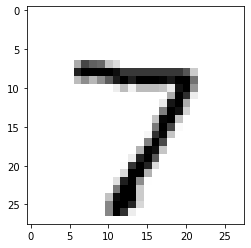

In [22]:
digit = test_images[0].reshape((28,28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

<h2>Prediction on first image</h2>

In [23]:
network.predict_classes(test_images)[0]

7